# MISIONES ESPACIALES EN LA CARRERA ESPACIAL DESDE 1957

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from functions import *
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Cargamos la Base de Datos
space_missions = pd.read_csv('space_missions.csv', encoding='latin-1')
space_missions

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022-07-24,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-24,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022-07-27,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [3]:
#Nos quedamos con los años en la columna Date usando Regex
space_missions['Date'].replace(to_replace='\W+\d\w', value='',regex=True,inplace=True)
space_missions

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [4]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4630 entries, 0 to 4629
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company        4630 non-null   object
 1   Location       4630 non-null   object
 2   Date           4630 non-null   object
 3   Time           4503 non-null   object
 4   Rocket         4630 non-null   object
 5   Mission        4630 non-null   object
 6   RocketStatus   4630 non-null   object
 7   Price          1265 non-null   object
 8   MissionStatus  4630 non-null   object
dtypes: object(9)
memory usage: 325.7+ KB


In [5]:
#Observamos el num de compañías
space_missions['Company'].nunique()

62

In [6]:
#Y cuántas misiones han lanzado cada una
space_missions['Company'].value_counts()

RVSN USSR           1777
CASC                 338
Arianespace          293
General Dynamics     251
VKS RF               216
                    ... 
OneSpace               1
Douglas                1
GK LS                  1
Firefly                1
CAS Space              1
Name: Company, Length: 62, dtype: int64

In [146]:
space_missions



,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure
...,...,...,...,...,...,...,...,...,...
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022,17:39:00,Falcon 9 Block 5,Starlink Group 3-2,Active,67,Success
4626,CASC,"LC-101, Wenchang Satellite Launch Center, China",2022,06:22:00,Long March 5B,Wentian,Active,NaN,Success
4627,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022,13:38:00,Falcon 9 Block 5,Starlink Group 4-25,Active,67,Success
4628,CAS Space,"Jiuquan Satellite Launch Center, China",2022,04:12:00,Zhongke-1A,Demo Flight,Active,NaN,Success


In [7]:
#Que empresas han tenido más actividad en 2022
a_2022=space_missions[space_missions['Date']=='2022']
a_2022['Company'].value_counts()

SpaceX          33
CASC            24
VKS RF           6
Rocket Lab       5
ULA              4
Astra            3
Roscosmos        3
Arianespace      2
ISRO             2
Virgin Orbit     2
Blue Origin      2
KARI             1
ESA              1
CASIC            1
Northrop         1
i-Space          1
IRGC             1
CAS Space        1
Name: Company, dtype: int64

# LANZAMIENTOS DE SPACE X

In [8]:
#Creamos un DF con los lanzamientos de Space X
space_x_data = space_missions[space_missions['Company'] == 'SpaceX']
space_x_data.to_csv('space_x.csv')
space_x_data.head(10)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
3394,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2006,21:30:00,Falcon 1,FalconSat-2,Retired,7,Failure
3444,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2007,01:10:00,Falcon 1,DemoSat,Retired,7,Failure
3515,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2008,03:34:00,Falcon 1,Flight 3,Retired,7,Failure
3523,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2008,23:15:00,Falcon 1,RatSat,Retired,7,Success
3560,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2009,03:35:00,Falcon 1,RazakSat,Retired,7,Success
3601,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2010,18:45:00,Falcon 9 v1.0,Flight 1,Retired,59.5,Success
3619,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2010,15:43:00,Falcon 9 v1.0,COTS-1,Retired,59.5,Success
3676,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2012,07:44:00,Falcon 9 v1.0,COTS-2+,Retired,59.5,Success
3694,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2012,00:35:00,Falcon 9 v1.0,CRS-1,Retired,59.5,Partial Failure
3710,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2013,15:10:00,Falcon 9 v1.0,CRS-2,Retired,59.5,Success


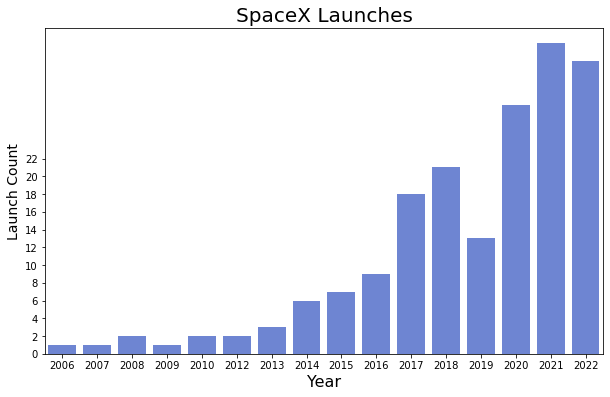

In [9]:
#Creamos un mini DF con el num de lanzamientos para cada año
space_x_year_misions = space_x_data.groupby('Date')['Date'].count().to_frame('Yearly_Count').reset_index()
#Barplot
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=space_x_year_misions['Date'], y=space_x_year_misions['Yearly_Count'], color="#5E7CE2")
ax.set_yticks(np.arange(0, 24, step=2))
ax.set_ylabel('Launch Count', fontsize=14)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('SpaceX Launches', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Density'>

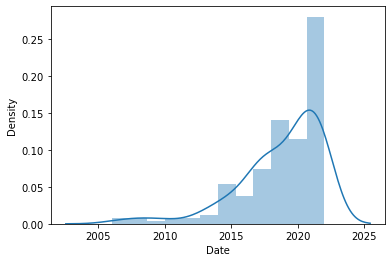

In [10]:
sns.distplot(space_x_data.Date)

<AxesSubplot:xlabel='Date', ylabel='Yearly_Count'>

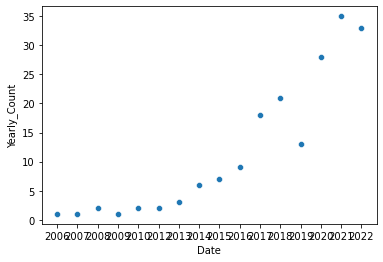

In [11]:
sns.scatterplot(data= space_x_year_misions, x='Date', y='Yearly_Count')

In [71]:
x1=space_x_year_misions.Date.astype(float)
y1=space_x_year_misions.Yearly_Count.astype(float)

In [72]:
x1_array= np.array(x1)
x1_array= x1_array.reshape(-1, 1)

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x1_array, y1,  test_size=0.2, random_state=42)

In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model



poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.000000e+00, 2.020000e+03, 4.080400e+06],
       [1.000000e+00, 2.018000e+03, 4.072324e+06],
       [1.000000e+00, 2.015000e+03, 4.060225e+06],
       [1.000000e+00, 2.016000e+03, 4.064256e+06],
       [1.000000e+00, 2.008000e+03, 4.032064e+06],
       [1.000000e+00, 2.022000e+03, 4.088484e+06],
       [1.000000e+00, 2.010000e+03, 4.040100e+06],
       [1.000000e+00, 2.014000e+03, 4.056196e+06],
       [1.000000e+00, 2.017000e+03, 4.068289e+06],
       [1.000000e+00, 2.019000e+03, 4.076361e+06],
       [1.000000e+00, 2.009000e+03, 4.036081e+06],
       [1.000000e+00, 2.013000e+03, 4.052169e+06]])

In [75]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.00000000e+00 -7.74518910e+02  1.92760381e-01]
Intercept:  778013.2909518557


In [76]:
from sklearn.metrics import r2_score

#Indice de acierto de nuestro test
test_x_poly = poly.transform(x_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )

Mean absolute error: 2.55
Residual sum of squares (MSE): 10.70
R2-score: 0.95


In [26]:
clf.intercept_

778013.2909518557

Text(0, 0.5, 'missions')

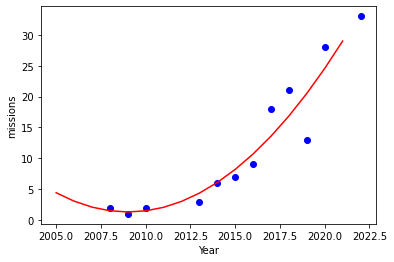

In [27]:
#Predicción del modelo de Regresión no lineal- Regresión Polynomial
plt.scatter(x_train, y_train,  color='blue')
XX = np.arange(2005, 2022, 1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Year")
plt.ylabel("missions")

# LANZAMIENTOS CASC (Compañia de Ciencia y Tecnología de China)

In [154]:
CASC_data = space_missions[space_missions['Company'] == 'CASC']
#Descomentar la linea de abajo para eliminar la columna 2022 ya que lo podemos considerar outlier y así mejorar la prediccion.
#CASC_data = CASC_data[CASC_data['Date']<'2022'].reset_index()
CASC_data.to_csv('CASC.csv')


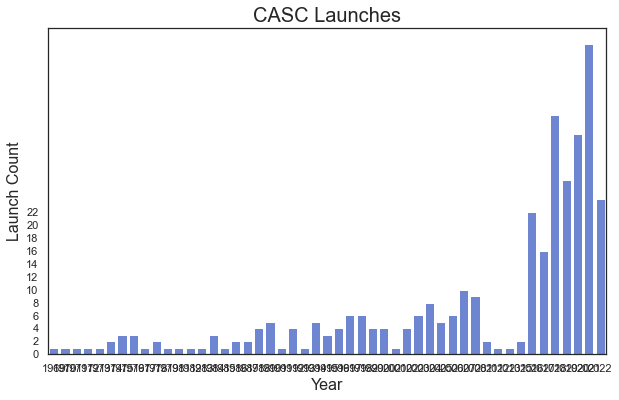

In [155]:
CASC_year_misions = CASC_data.groupby('Date')['Date'].count().to_frame('Yearly_Count').reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=CASC_year_misions['Date'], y=CASC_year_misions['Yearly_Count'], color="#5E7CE2")
ax.set_yticks(np.arange(0, 24, step=2))
ax.set_ylabel('Launch Count', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('CASC Launches', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Yearly_Count'>

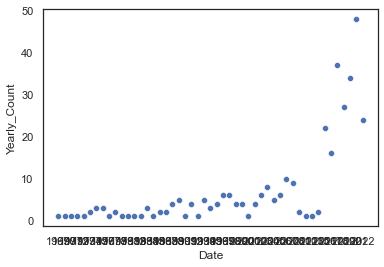

In [156]:
sns.scatterplot(data= CASC_year_misions, x='Date', y='Yearly_Count')

In [157]:
x1=CASC_year_misions.Date.astype(float)
y1=CASC_year_misions.Yearly_Count.astype(float)

In [158]:
x1_array= np.array(x1)
x1_array= x1_array.reshape(-1, 1)

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x1, y1,  test_size=0.2, random_state=42)

In [160]:
x_train,x_test,y_train,y_test = train_test_split(x1_array, y1,  test_size=0.2)

In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model



poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.000000e+00, 2.001000e+03, 4.004001e+06],
       [1.000000e+00, 2.002000e+03, 4.008004e+06],
       [1.000000e+00, 1.971000e+03, 3.884841e+06],
       [1.000000e+00, 2.018000e+03, 4.072324e+06],
       [1.000000e+00, 1.998000e+03, 3.992004e+06],
       [1.000000e+00, 1.994000e+03, 3.976036e+06],
       [1.000000e+00, 2.004000e+03, 4.016016e+06],
       [1.000000e+00, 2.022000e+03, 4.088484e+06],
       [1.000000e+00, 2.012000e+03, 4.048144e+06],
       [1.000000e+00, 2.013000e+03, 4.052169e+06],
       [1.000000e+00, 2.021000e+03, 4.084441e+06],
       [1.000000e+00, 1.997000e+03, 3.988009e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.979000e+03, 3.916441e+06],
       [1.000000e+00, 1.981000e+03, 3.924361e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.006000e+03, 4.024036e+06],
       [1.000000e+00, 1.972000e+03, 3.888784e+06],
       [1.000000e+00, 1.993000e+03, 3.972049e+06],
       [1.000000e+00, 1.990000e

In [162]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [ 0.00000000e+00 -8.16329036e+01  2.05676564e-02]
Intercept:  80999.71626274852


In [163]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test,test_y_ ) )

Mean absolute error: 3.81
Residual sum of squares (MSE): 27.66
R2-score: 0.71


Text(0, 0.5, 'missions')

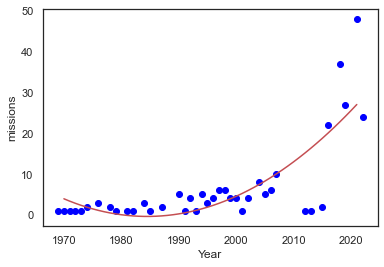

In [164]:
plt.scatter(x_train, y_train,  color='blue')
XX = np.arange(1970, 2022, 1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Year")
plt.ylabel("missions")

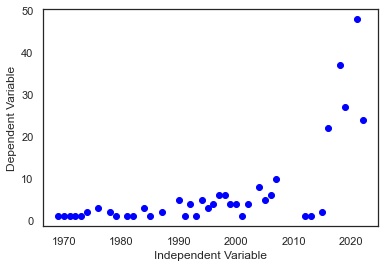

In [169]:
#Intento de Exponencial
plt.scatter(x_train, y_train,  color='blue')
X = np.arange(1970, 2022, 1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# LANZAMIENTOS NASA

In [150]:
NASA_data = space_missions[space_missions['Company'] == 'NASA']
NASA_data.to_csv('NASA.csv')

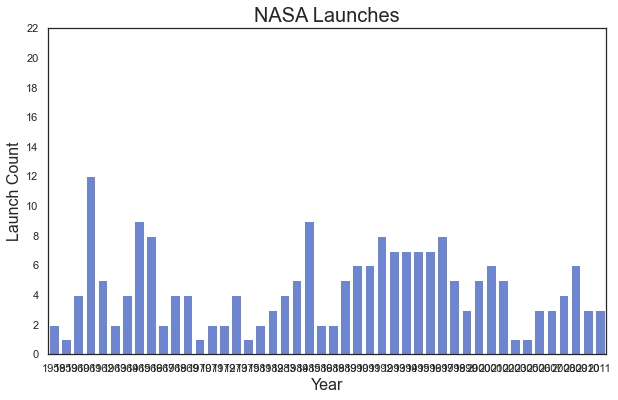

In [151]:
NASA_year_misions = NASA_data.groupby('Date')['Date'].count().to_frame('Yearly_Count').reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=NASA_year_misions['Date'], y=NASA_year_misions['Yearly_Count'], color="#5E7CE2")
ax.set_yticks(np.arange(0, 24, step=2))
ax.set_ylabel('Launch Count', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('NASA Launches', fontsize=20)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Yearly_Count'>

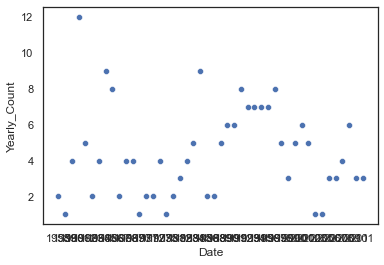

In [152]:
sns.scatterplot(data= NASA_year_misions, x='Date', y='Yearly_Count')

# LANZAMIENTOS UNITED LAUNCH ALLIANCE

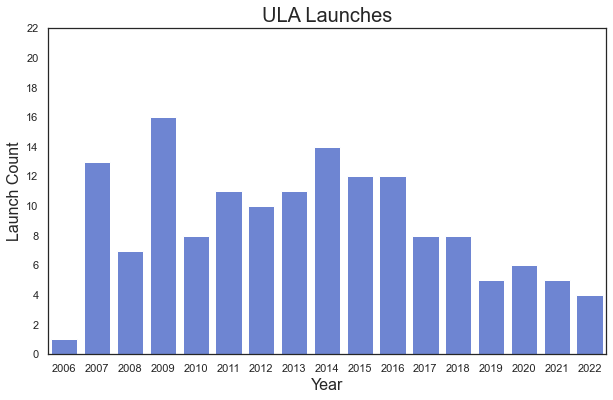

In [171]:
ULA_year_misions = ULA_data.groupby('Date')['Date'].count().to_frame('Yearly_Count').reset_index()

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=ULA_year_misions['Date'], y=ULA_year_misions['Yearly_Count'], color="#5E7CE2")
ax.set_yticks(np.arange(0, 24, step=2))
ax.set_ylabel('Launch Count', fontsize=16)
ax.set_xlabel('Year', fontsize=16)
ax.set_title('ULA Launches', fontsize=20)
plt.show()